# Analysing and learning new things

For this assingment I struggle to understand and complete. I will be exploring how to complete this assingment properly. At the end I will ask questions and prove to myself that I understand the process that went thought this program. 

First im going to import what i need 
second im going to load the data

In [39]:
import pandas as pd
import seaborn as sns

In [40]:
data_file = 'https://nces.ed.gov/programs/digest/d12/tables/xls/tabn349.xls'

In [41]:
pd.read_excel(data_file)

,"Table 349. Degrees in computer and information sciences conferred by degree-granting institutions, \n by level of degree and sex of student: 1970-71 through 2010-11",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Year,Bachelor's degrees,NaN,NaN,NaN,NaN,Master's degrees,NaN,NaN,Doctor's degrees,NaN,NaN
1,NaN,Total,NaN,Males,Females,Females as a percent of total,Total,Males,Females,Total,Males,Females
2,NaN,Number,Annual percent change,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2,3,4,5,6,7,8,9,10,11,12
4,1970-71 ..........................,2388,†,2064,324,13.5678,1588,1424,164,128,125,3
5,1971-72 ..........................,3402,42.4623,2941,461,13.5509,1977,1752,225,167,155,12
6,1972-73 ...........................,4304,26.5138,3664,640,14.8699,2113,1888,225,196,181,15
7,1973-74 ..........................,4756,10.5019,3976,780,16.4003,2276,1983,293,198,189,9
8,1974-75 ...........................,5033,5.82422,4080,953,18.935,2299,1961,338,213,199,14
9,NaN,NaN,,,,NaN,,,,,,


Just from seeing this table you can tell it has many errors. It has missing values, the column names are unnamed, the first columns has unnecessary information, also the last 7 rows have to be dropped.

In [42]:
#Not all rows are data so i dropped and kept all the data up to the range(3)
cs_df = pd.read_excel(data_file,skipfooter=8,header=list(range(3)),skiprows=1)

In [43]:
cs_df.head(5)

Year Bachelor's degrees  \
                    Unnamed: 0_level_1              Total   
                    Unnamed: 0_level_2             Number   
0                                    1                2.0   
1   1970-71 ..........................             2388.0   
2   1971-72 ..........................             3402.0   
3  1972-73 ...........................             4304.0   
4   1973-74 ..........................             4756.0   

                                                               \
                                     Males            Females   
  Annual percent change Unnamed: 3_level_2 Unnamed: 4_level_2   
0                     3                  4                  5   
1                     †               2064                324   
2               42.4623               2941                461   
3               26.5138               3664                640   
4               10.5019               3976                780   

                                  Master's degrees                     \
  Females as a percent of total              Total              Males   
             Unnamed: 5_level_2 Unnamed: 6_level_2 Unnamed: 7_level_2   
0                      6.000000                  7                  8   
1                     13.567839               1588               1424   
2                     13.550852               1977               1752   
3                     14.869888               2113               1888   
4                     16.400336               2276               1983   

                       Doctor's degrees                      \
             Females              Total               Males   
  Unnamed: 8_level_2 Unnamed: 9_level_2 Unnamed: 10_level_2   
0                  9                 10                  11   
1                164                128                 125   
2                225                167                 155   
3                225                196                 181   
4                293                198                 189   

                       
              Females  
  Unnamed: 11_level_2  
0                  12  
1                   3  
2                  12  
3                  15  
4                   9

In [44]:
#this drops the row zero 
cs_df.drop(labels=[0],inplace=True)

In [45]:
#The column sets year ad the index and it gets rid of Unnamed: 0_level_1 and Unnamed: 0_level_2
cs_df.set_index('Year',inplace=True)

In [46]:
#drops all NAN because it has missing values
cs_df.dropna('index',inplace=True)

In [47]:
#Fixes the years because it had extra periods and it strip it all
year_mapper = {yr: yr[0].replace('.','').strip() for yr in cs_df.index}

In [48]:
#re-names years
cs_df.rename(year_mapper, inplace=True)

In [49]:
#Selects all columns with degrees
#I managed change all the degree level to just Bachelor, Master and Doctor but i learned a new way to do it and this 
#is more eficient to do
degree_mapper = {c[0]:c[0][:-10] for c in cs_df.columns}

In [50]:
#drops all degress from bachelor, master, doctor
cs_df.head()

Bachelor's degrees                                           \
                     Total                                    Males   
                    Number Annual percent change Unnamed: 3_level_2   
Year                                                                  
1970-71             2388.0                     †               2064   
1971-72             3402.0               42.4623               2941   
1972-73             4304.0               26.5138               3664   
1973-74             4756.0               10.5019               3976   
1974-75             5033.0               5.82422               4080   

                                                           Master's degrees  \
                   Females Females as a percent of total              Total   
        Unnamed: 4_level_2            Unnamed: 5_level_2 Unnamed: 6_level_2   
Year                                                                          
1970-71                324                     13.567839               1588   
1971-72                461                     13.550852               1977   
1972-73                640                     14.869888               2113   
1973-74                780                     16.400336               2276   
1974-75                953                     18.935029               2299   

                                                Doctor's degrees  \
                     Males            Females              Total   
        Unnamed: 7_level_2 Unnamed: 8_level_2 Unnamed: 9_level_2   
Year                                                               
1970-71               1424                164                128   
1971-72               1752                225                167   
1972-73               1888                225                196   
1973-74               1983                293                198   
1974-75               1961                338                213   

                                                 
                      Males             Females  
        Unnamed: 10_level_2 Unnamed: 11_level_2  
Year                                             
1970-71                 125                   3  
1971-72                 155                  12  
1972-73                 181                  15  
1973-74                 189                   9  
1974-75                 199                  14

In [51]:
#separate columns that have data from thsoe with statistics into two new data frames 
#I had trouble seperating the files because i didnt want to delete or drop some information so i learned to seperate 
#the data into two different tables
stat_columns = [c for c in cs_df.columns if (not('Unnamed' in c[2]) or ('otal' in c[1])) ]
degrees_df = cs_df.drop(stat_columns,axis=1)
summary_df = cs_df[stat_columns]

In [52]:
degrees_df.head()

Bachelor's degrees                      Master's degrees  \
                     Males            Females              Males   
        Unnamed: 3_level_2 Unnamed: 4_level_2 Unnamed: 7_level_2   
Year                                                               
1970-71               2064                324               1424   
1971-72               2941                461               1752   
1972-73               3664                640               1888   
1973-74               3976                780               1983   
1974-75               4080                953               1961   

                              Doctor's degrees                      
                   Females               Males             Females  
        Unnamed: 8_level_2 Unnamed: 10_level_2 Unnamed: 11_level_2  
Year                                                                
1970-71                164                 125                   3  
1971-72                225                 155                  12  
1972-73                225                 181                  15  
1973-74                293                 189                   9  
1974-75                338                 199                  14

Now we have two different tables one with the years and how many Females or males graduated from what degrees
The second table has the annual percentage and female percentage of graduates students and with what degree they got

In [53]:
#renaming the column names
degrees_df = degrees_df.unstack().reset_index().drop('level_2',axis=1)
degrees_df.rename(columns= {'level_0':'degree_level',
                            'Year':'academic_year',
                            'level_1':'gender',
                           0:'number'},inplace=True)
degrees_df.head()

,degree_level,gender,academic_year,number
0,Bachelor's degrees,Males,1970-71,2064
1,Bachelor's degrees,Males,1971-72,2941
2,Bachelor's degrees,Males,1972-73,3664
3,Bachelor's degrees,Males,1973-74,3976
4,Bachelor's degrees,Males,1974-75,4080


In [54]:
#adding column year into the table
#I was able to understand how to use lambda althought tbelow is just a small example i know how to use it know
year_split = lambda ay: int(ay.split('-')[0])
degrees_df['year'] = degrees_df['academic_year'].apply(year_split)
degrees_df.head(7)

,degree_level,gender,academic_year,number,year
0,Bachelor's degrees,Males,1970-71,2064,1970
1,Bachelor's degrees,Males,1971-72,2941,1971
2,Bachelor's degrees,Males,1972-73,3664,1972
3,Bachelor's degrees,Males,1973-74,3976,1973
4,Bachelor's degrees,Males,1974-75,4080,1974
5,Bachelor's degrees,Males,1975-76,4534,1975
6,Bachelor's degrees,Males,1976-77,4876,1976


Display a scatter plot for both Male and Female in how many graduated each year by having a different color for each degree level

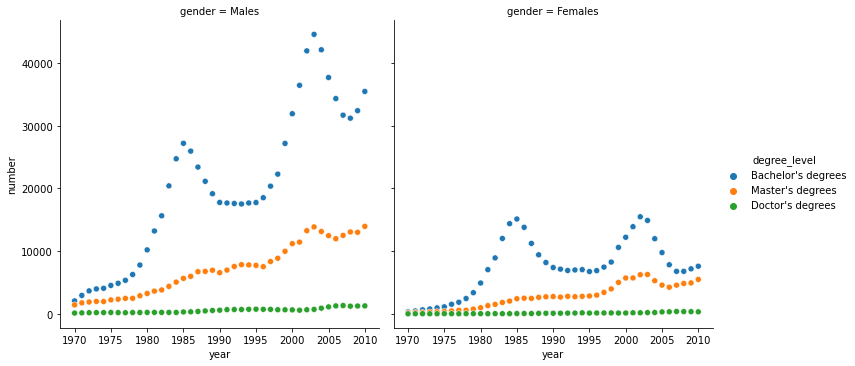

In [55]:
g = sns.relplot(data=degrees_df,x='year',y='number',col = 'gender',hue='degree_level')

The main thing i learned from completing this assingment was seperetaing the data into two different tables to make the table look nicer and more readable. This has expand my knowledge in how to sepereta data that does not belong in that table and instead of dropping(deleting) the data i can just create a new table.Although i knew how to do the mojority of this, I did it different it worked but not as efficient as the code above.